
TFG

Este es el codigo del tfg de Borja Jimeno

En esta primera celda vamos a definir todas las funciones y variables que necesitaremos para calcular el ritmo teórico. Cada función está explicada al inicio y cada variable tiene asociadas sus unidades en un comentario a la derecha.  

Para la realización de las funciones se ha tomado como referencia:  
-El pdf ('rateTutorial_MMartinez_TAE25.pdf)    
-El capítulo 7 de la Tesis de María ('tesisMaria_chap7.pdf')   
-El artículo 'Inelastic and Elastic Scattering of 187-Mev Electrons from Selected Even-Even Nuclei - Richard Helm - PHISICAL REVIEW VOLUME 104, NUMBER 5 DECEMBER 1, 1956'  
-Para calcular el Quenching Factor, Sección 4.3.2 de la tesis de Tamara Pardo Yanguas ('Tesis-Tamara.pdf')



In [14]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm

from funciones_ritmo_teorico import*
from funciones_ritmo_exp import*


plt.rcParams['font.size'] = 18



En este codigo vamos a calcular el ritmo diferencial de interaccion de un WIMP en el detector. Sabemos que el ritmo esperado en el detector debe ser proporcional al numero de nuclos blanco ($N_T$), a la densidad numerica de WIMPs ($n_\chi$), al promedio de la velcidad relativa entre el WIMP y el detector ($\langle v \rangle$) y a la seccion eficaz ($\sigma$):

$$R\approx N_T \times n_{\chi} \times \langle v \rangle \times \sigma = \frac{M_{det}}{m_N} \times \frac{\rho_{\chi}}{m_{\chi}}  \times \int_0^\infty vf(v)d^3v \times \sigma \phantom{asd} \left[cts\cdot s^{-1}\right]$$

Donde:

$M_{det}$ es la masa del detector.\
$m_{N}$ es la masa nuclear.\
$\rho_{\chi}$ es la densidad de WIMPs.\
$m_{\chi}$ es la masa del WIMP.

De esta expresion, se puede obtener el ritmo diferencial por unidad de energia de retroceso:
$$\frac{dR}{dE_R}=\frac{M_{det}}{m_N}\frac{\rho_{\chi}}{m_{\chi}}\int^{\infty}_{0}vf(v)\frac{d\sigma}{dE_R}(v,E_R)d^3v \phantom{asd} $$

Asumiremos ciertas condiciones que nos ayudan a simplificar esta ultima formula:

Dado que los detectores tienen un umbral de energia $E_R$, existe una velocidad minima de los WIMPS que interactuan con los detectores, por lo que el limite inferior de la integral ya no es $0$ si no que es $v_{min}=\sqrt{\frac{E_R m_N}{2\mu^2_{\chi N}}}$.En la expresion, $\mu^2_{\chi N}=\frac{m_N m_{\chi}}{m_N + m_{\chi}}$ es la masa reducida del sistema nucleo-WIMP, con $m_N$ la masa del nucleo.

En cuanto a la velocidad maxima, se toma la velocidad de escape de la galxia $v_{esc}$

Desarrollando la expresion de la seccion eficaz diferencial, se puede expresar como el producto de la seccion eficaz puntual por un factor de forma nuclear. Si ademas asumimos que la interaccion es Spin Independent, llegamos a la sigueinte expresion:

$$\frac{d\sigma}{dE_R}(v,E_r)=\frac{d\sigma}{dE_R}(v,0)F^2(q)=\frac{m_N}{2\mu^2_{\chi N}v^2}\frac{m_N A^2 \mu^2_{\chi N}}{\mu^2_{\chi n}}\sigma_{SI}F^2(q)=\frac{m_N A^2 \sigma_{SI} F^2(q)}{2 v^2 \mu^2_{\chi n}}$$

Por lo que la integral del promedio de la velocidad queda:

$$\int^{\infty}_{0}vf(v)\frac{d\sigma}{dE_R}(v,E_R)d^3v=\frac{m_N A^2 \sigma_{SI} F^2(q)}{2 \mu^2_{\chi n}}\int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v^2}d^3v=\frac{m_N A^2 \sigma_{SI} F^2(q)}{2 \mu^2_{\chi n}} \eta (v_{min},t)$$

Trabajaremos con el modelo de halo estandar (SHM), por lo que la integral dada por $\eta (v_{min},t)$ es analitica. (Se vera mas adelante)

Con todo esto llegamos a la Master Formula:

## $$\frac{dR}{dE_R}=\frac{M_{det} \rho_{\chi}}{2 m_{\chi} \mu^2_{\chi n}}A^2 \sigma_{SI} F^2(q) \int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v$$





### Unidades de la integral:
$$\frac{dR}{dE_R}=\frac{M_{det} \rho_{\chi}}{2 m_{\chi} \mu^2_{\chi n}}A^2 \sigma_{SI} F^2(q) \int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v$$

$$M_{det} \phantom{d} \left[GeV\cdot c^{-2}\right] \phantom{asda} \rho_{\chi} \phantom{d} \left[GeV\cdot c^{-2} \cdot cm^-3\right] \phantom{asda} M_{\chi} \phantom{d} \left[GeV\cdot c^{-2}\right]$$

$$\mu^2_{\chi n} \phantom{d} \left[GeV\cdot c^{-2}\right]^2 \phantom{asda} \sigma_{SI} \phantom{d} \left[cm^2\right] \phantom{asda} \int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v \phantom{d} \left[s\cdot km^{-1}\right]$$

$$F^2(q) \phantom{d} [\textup{Adimensional}] \phantom{asda} A^2 \phantom{d} [\textup{Adimensional}]$$




Calculamos las unidades de la expresion sin la integral:

$$\frac{M_{det} \rho_{\chi}}{2 m_{\chi} \mu^2_{\chi n}}A^2 \sigma_{SI} F^2(q) \rightarrow \frac{\left[GeV\cdot c^{-2}\right]\left[GeV\cdot c^{-2} \cdot cm^{-3}\right]}{\left[GeV\cdot c^{-2}\right]\left[GeV\cdot c^{-2}\right]^2 }\cdot cm^2 \rightarrow \left[ c^2 \cdot GeV^{-1} \cdot cm^{-1}\right]$$

Sustituimos el valor de $c^2$ en  $ \left[ m\cdot s^{-1} \right]$

$$\left[ c^2 \cdot GeV^{-1} \cdot cm^{-1}\right] \rightarrow  \left(3\cdot 10^8\right)^2 \left[ m^2 \cdot s^{-2} \cdot GeV^{-1} \cdot cm^{-1}\right] \left[ 100 \cdot cm\cdot m^{-1}\right]\rightarrow 100\cdot\left(3\cdot 10^8\right)^2 \left[ m\cdot  s^{-2} \cdot GeV^{-1}\right] $$

Calculamos las unidades la expresion por completo, multiplicando lo anterior por las unidades de la integral:

$$\frac{M_{det} \rho_{\chi}}{2 m_{\chi} \mu^2_{\chi n}}A^2 \sigma_{SI} F^2(q) \int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v \rightarrow 100\cdot\left(3\cdot 10^8\right)^2 \left[ m\cdot  s^{-2} \cdot GeV^{-1}\right] \left[ s \cdot km^{-1}\right]\left[ 1000^{-1} \cdot km\cdot m^{-1}\right]$$
$$\boxed{\frac{dR}{dE_R} \rightarrow \frac{\left(3\cdot 10^8\right)^2}{10} \left[ GeV^{-1}\cdot s^{-1}\right] }$$

Hacemos el cambio de unidades para pasar a $\left[ KeV^{-1} \cdot s^{-1}\right]$:

$$\frac{\left(3\cdot 10^8\right)^2}{10} \left[ GeV^{-1} s^{-1}\right] \cdot \left[1000^{-2}\cdot keV^{-1}\cdot GeV\right]\rightarrow \boxed{\frac{\left(3\cdot 10^8\right)^2}{10^7} \left[ keV^{-1} \cdot s^{-1}\right]}$$

Pasamos a $\left[ KeV^{-1} \cdot d^{-1}\right]$:

$$\frac{\left(3\cdot 10^8\right)^2}{10^7} \left[ keV^{-1} \cdot s^{-1}\right] \left[ 86400 \cdot s^{-1} \cdot d \right] \rightarrow \boxed{\left(3\cdot 10^8\right)^2\cdot 
\left(8.64\cdot 10^{-3} \right) \cdot \left[ keV^{-1} \cdot d^{-1}\right]}$$

Pasamos a $\left[ KeV^{-1} \cdot y^{-1}\right]$:

$$\left(3\cdot 10^8\right)^2\cdot \left(8.64\cdot 10^{-3} \right) \cdot \left[ keV^{-1} \cdot d^{-1}\right]  \left[ 365 \cdot d \cdot y^{-1}\right] \rightarrow \boxed{\left(3\cdot 10^8\right)^2\cdot \left(8.64\cdot 10^{-3} \right) \cdot (365)\cdot \left[ keV^{-1} \cdot y^{-1}\right]}$$

## Integral por unidad de masa de detector

Dada la masa en kg del detector (suponiendo que esta formado por un unico material de numero masico $A$) $M^{'}_{det}$, tenemos que corresponden:

$$1000 \left[ g\cdot kg^{-1}\right] \cdot \frac{M^{'}_{det} \left[ kg \right]}{A \left[ g \cdot mol^{-1} \right]} = \boxed{1000 \cdot \frac{M^{'}_{det}}{A}  \left[ mol \right]} $$

Dado el numero de moles tenemos el siguiente numero de nucleos del material:

$$1000 \cdot \frac{M^{'}_{det}}{A}  \left[ mol \right] \cdot N_A  \left[ \textup{nucleos}\cdot mol^{-1} \right] = \boxed{1000 \cdot \frac{M^{'}_{det}}{A} \cdot N_A \left[ \textup{nucleos} \right]}$$

A partir de el numero de nucleos calculamos el numero de nucleones:

$$1000 \cdot \frac{M^{'}_{det}}{A} \cdot N_A \left[ \textup{nucleos} \right] \cdot A \left[ \textup{nucleones} \cdot \textup{nucleos}^{-1} \right] = \boxed{1000 \cdot \frac{M^{'}_{det}}{A} \cdot N_A \cdot A \left[ \textup{nucleones} \right]}$$

Con esta expresion podemos calcular la masa del detector en funcion de su masa en $\left[ kg \right]$, multiplicando por la masa de cada nucleon en $\left[ GeV\cdot c^{-2} \right]$

$$ M_{det}=1000 \cdot \frac{M^{'}_{det}}{A} \cdot N_A \cdot A \left[ \textup{nucleones} \right] \cdot m_n \left[ GeV \cdot c^{-2} \cdot \textup{nucleones}^{-1} \right] = \boxed{1000 \cdot \frac{M^{'}_{det}}{A} \cdot N_A \cdot A \cdot m_n \left[ GeV \cdot c^{-2} \right]}$$

Sustituyendo y dividiendo por la masa del detector en kg:

$$\frac{dR}{dE_R}=M_{det} \cdot \left[\frac{\rho_{\chi}}{2 m_{\chi} \mu^2_{\chi n}}A^2 \sigma_{SI} F^2(q) \int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v\right] \left[ keV^{-1} \cdot y^{-1}\right]$$

$$\boxed{\frac{1}{M_{det}}\left(\frac{dR}{dE_R}\right)=\frac{\rho_{\chi}}{2 m_{\chi} \mu^2_{\chi n}}A^2 \sigma_{SI} F^2(q) \int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v \left[ keV^{-1} \cdot y^{-1} \cdot kg^{-1}\right]}$$

Esta es la funcion que implementamos en el codigo como rate:


In [15]:
def rate(E,t,A,mW,sigmaSI):
    Mdet=1000*NA*mn                                 # masa de 1 kg de detector [GeV/c^2]
    mu_n=mW*mn/(mW+mn)                              # masa reducida del sistema nucleon-WIMP [Gev/c^2]
    retval=Mdet*rho/2./mW/mu_n/mu_n*A*A*sigmaSI     # Producto de los primeros terminos [cts*c^2/Gev/cm]
    retval*=c*c                                     # Conversion a 100*[cts*m/s^2/Gev]
    retval*=FF(E,A)                                 # Multiplicamos por factor de forma atomico (Adimensional) 100*[cts*m/s^2/Gev]
    retval*=eta(E,t,A,mW)                           # Multiplicamos por integral 0.1*[cts/GeV/s]
    retval*=8.64e-3                                 # Convertimos a [cts/KeV/d]
    retval*=365                                     # Convertimos a [cts/KeV/y]
    return retval


## Obtencion del ritmo en una ventana de energia

Tenemos que hacer la integral del 

Dia 1
En este primer apartado sacamos graficas para familiarizarnos con las funciones definidas en la parte superior.
Calculamos el ritmo teórico diferencial para diferentes targets. En este caso para Na, I y NaI.

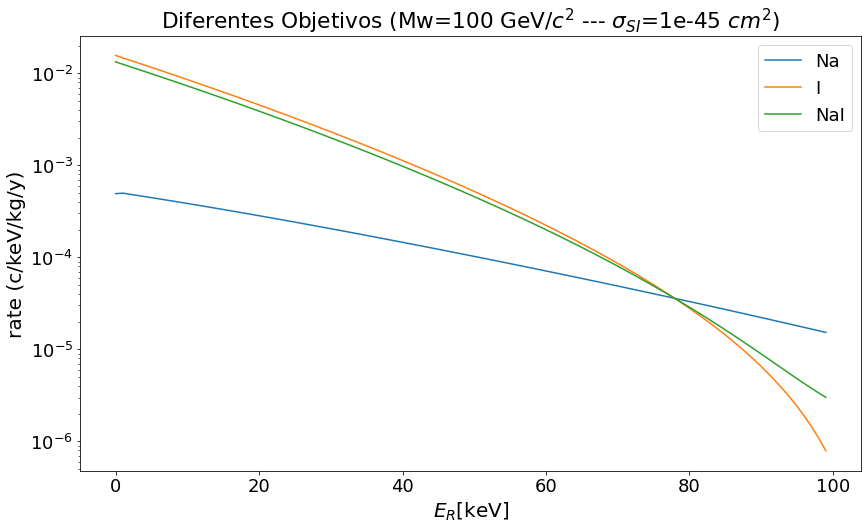

In [16]:

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

mW=100 #masa wimp (geV/c^2)
si=1e-45 #seccion eficaz SI(cm^-2)
ene=np.arange(0,100,1)


rateNa=np.array([rate(e,timeAvg,23,mW,si) for e in ene])
rateI=np.array([rate(e,timeAvg,127,mW,si) for e in ene])
rate_NaI=np.array([RateNaI(e,timeAvg,mW,si) for e in ene])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,rateNa, label = "Na")
ax.plot(ene,rateI, label = "I")
ax.plot(ene,rate_NaI, label = "NaI")
ax.set_title(r'Diferentes Objetivos (Mw=' + str(np.round(mW)) + ' GeV/$c^2$ --- $\sigma_{SI}$=' + str(si) + ' $cm^2$)')
ax.set_ylabel(r'rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel(r'$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_yscale("log")

En esta segunda grafica hemos calculado el ritmo diferencial en funcion de diferentes masas del wimp para un objetivo de NaI

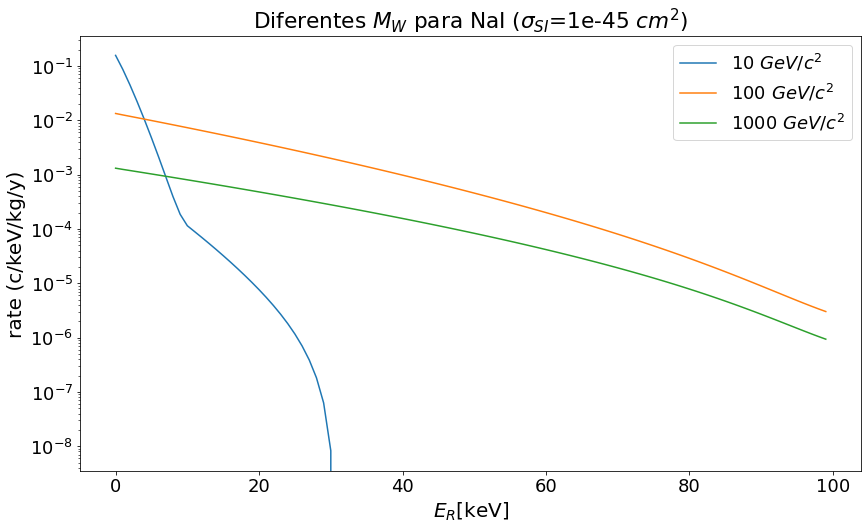

In [17]:

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.


si=1e-45 #seccion eficaz SI(cm^-2)
ene=np.arange(0,100,1)


rateAr10=np.array([RateNaI(e,timeAvg,10,si) for e in ene])
rateAr100=np.array([RateNaI(e,timeAvg,100,si) for e in ene])
rateAr1000=np.array([RateNaI(e,timeAvg,1000,si) for e in ene])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,rateAr10, label = "10 $GeV/c^2$")
ax.plot(ene,rateAr100, label = "100 $GeV/c^2$")
ax.plot(ene,rateAr1000, label = "1000 $GeV/c^2$")
ax.set_title(r'Diferentes $M_W$ para NaI ($\sigma_{SI}$=' + str(si) + ' $cm^2$)')
ax.set_ylabel(r'rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel(r'$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_yscale("log")


En esta segunda grafica hemos calculado el ritmo diferencial para dos fechas diferentes par un objetivo de NaI

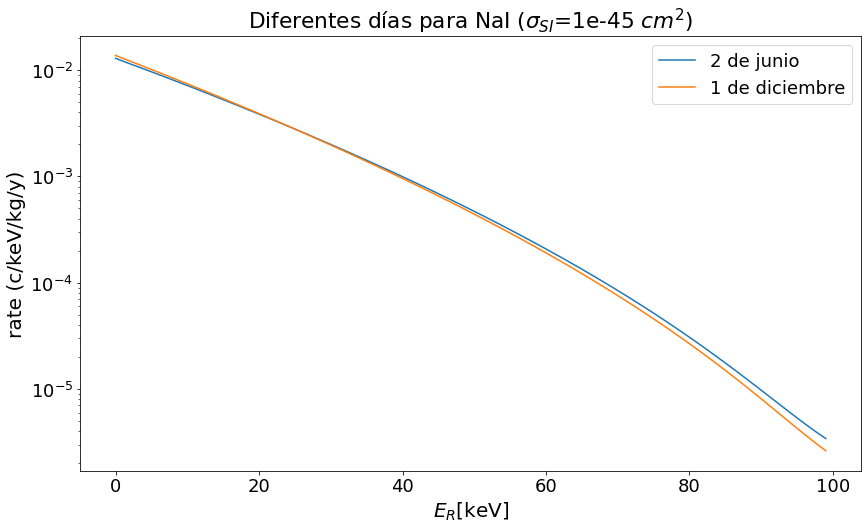

In [18]:

timeMax=72.9 
timeMin=255.5 

mW=100 #masa wimp (geV/c^2)
si=1e-45 #seccion eficaz SI(cm^-2)
ene=np.arange(0,100,1)


rateArtmax=np.array([RateNaI(e,timeMax,mW,si) for e in ene])
rateArtmin=np.array([RateNaI(e,timeMin,mW,si) for e in ene])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,rateArtmax, label = "2 de junio")
ax.plot(ene,rateArtmin, label = "1 de diciembre")

ax.set_title(r'Diferentes días para NaI ($\sigma_{SI}$=' + str(si) + ' $cm^2$)')
ax.set_ylabel(r'rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel(r'$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_yscale("log")



En esta grafica hemos representado el ritmo esperado integrando en un intervalo de energías $E \in (0,60)$ $keV$, en funcion del día, se espera ver cierta modulación del ritmo.

R_max = 2.692e+03
R_min = 2653.0
R_0 = 2673.0
t_max = 256
Error = 0.00998


Text(0.5, 0, 'time (days since March 22)')

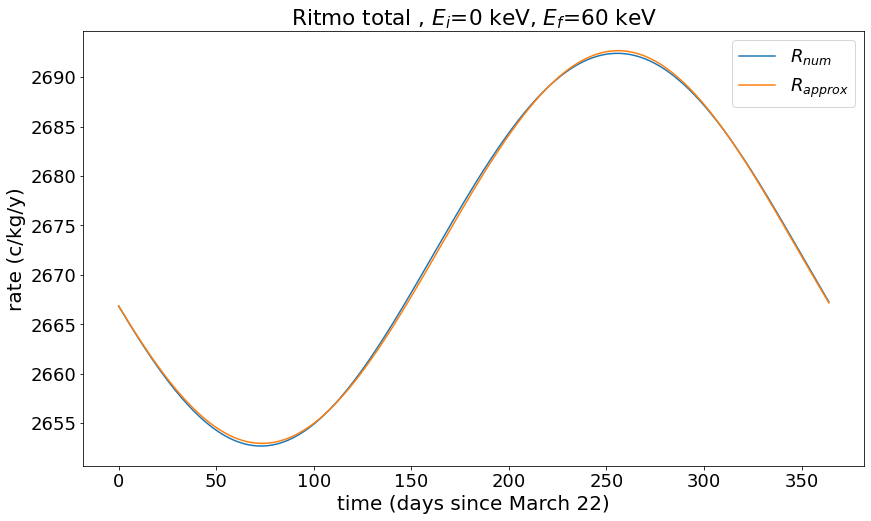

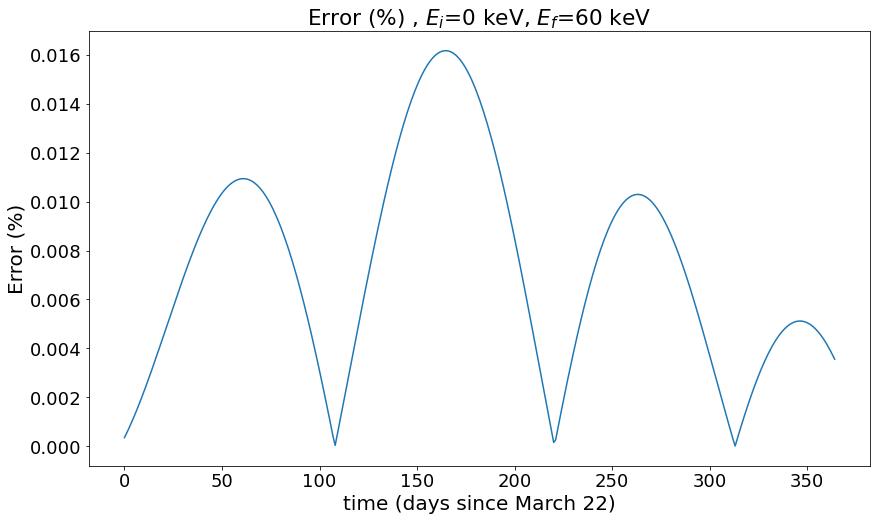

In [19]:

Ei=0
Ef=60

mW=70
si=1e-41 #seccion eficaz SI(cm^-2)
ritmosvstiempos=ratevsTimeNaI(Ei,Ef,mW,si)
R_max=np.max(ritmosvstiempos)
print('R_max = '+str(np.round(R_max)))
R_min=np.min(ritmosvstiempos)
print('R_min = '+str(np.round(R_min)))
R_0=np.mean(ritmosvstiempos)
print('R_0 = '+str(np.round(R_0)))
t_max=np.argmax(ritmosvstiempos)
print('t_max = '+str(t_max))

R_mod=0.5*(R_max-R_min)
omega=2*np.pi/365.

dias = np.arange(0,365)

rapprox=([(R_0+R_mod*np.cos(omega*(t-t_max))) for t in dias])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(dias,ritmosvstiempos, label = "$R_{num}$")
ax.plot(dias,rapprox, label = "$R_{approx}$")
ax.set_title('Ritmo total , $E_i$='+str(Ei)+' keV, $E_f$='+str(Ef)+' keV')
ax.set_ylabel('rate (c/kg/y)',fontsize=20)
ax.set_xlabel('time (days since March 22)',fontsize=20)
ax.legend()


err=([np.abs(((1-rapprox[t]/ritmosvstiempos[t]))*100) for t in dias])
print('Error = '+str(np.round(err[t_max],5)))

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(dias,err, label = "$R_{num}$")
ax.set_title('Error (%) , $E_i$='+str(Ei)+' keV, $E_f$='+str(Ef)+' keV')
ax.set_ylabel('Error (%)',fontsize=20)
ax.set_xlabel('time (days since March 22)',fontsize=20)
#ax.set_yscale("log")



En esta grafica hemos representado el ritmo esperado integrando en un intervalo de energías $E \in (10,60)$ $keV$, en funcion del día. Tambien se calcula una aproximación, en este caso se ve que el error de la aproximación es mayor si modificamos el intervalo de energías.

R_max = 1.284e+03
R_min = 1260.0
R_0 = 1273.0
t_max = 73
Error = 0.04523


Text(0.5, 0, 'time (days since March 22)')

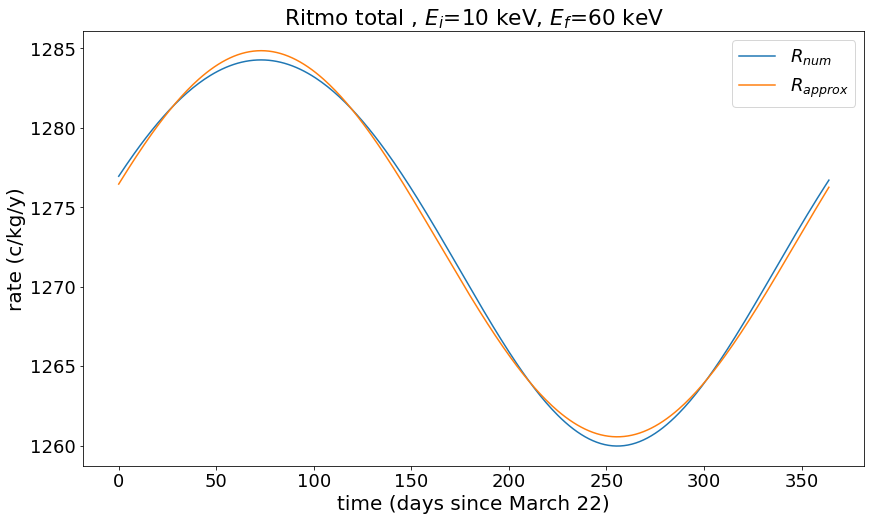

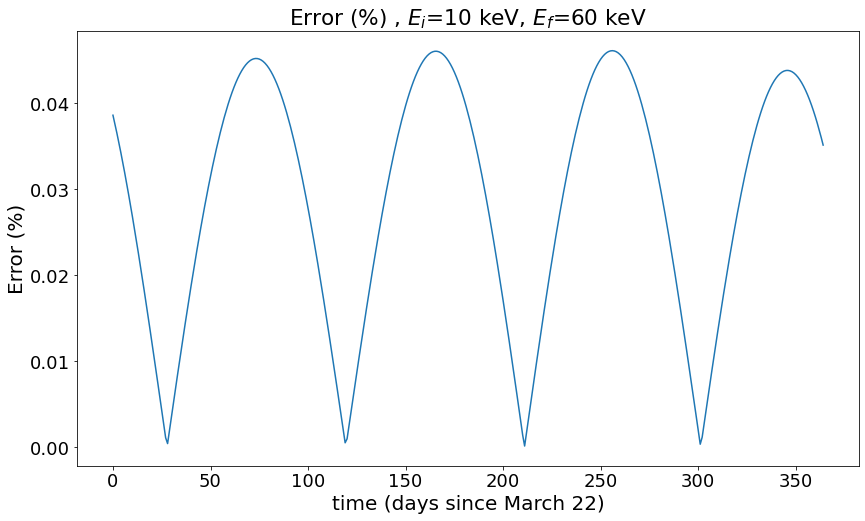

In [20]:
Ei=10
Ef=60

mW=70
si=1e-41 #seccion eficaz SI(cm^-2)
ritmosvstiempos=ratevsTimeNaI(Ei,Ef,mW,si)
R_max=np.max(ritmosvstiempos)
print('R_max = '+str(np.round(R_max)))
R_min=np.min(ritmosvstiempos)
print('R_min = '+str(np.round(R_min)))
R_0=np.mean(ritmosvstiempos)
print('R_0 = '+str(np.round(R_0)))
t_max=np.argmax(ritmosvstiempos)
print('t_max = '+str(t_max))

R_mod=0.5*(R_max-R_min)
omega=2*np.pi/365.

dias = np.arange(0,365)

rapprox=([(R_0+R_mod*np.cos(omega*(t-t_max))) for t in dias])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(dias,ritmosvstiempos, label = "$R_{num}$")
ax.plot(dias,rapprox, label = "$R_{approx}$")
ax.set_title('Ritmo total , $E_i$='+str(Ei)+' keV, $E_f$='+str(Ef)+' keV')
ax.set_ylabel('rate (c/kg/y)',fontsize=20)
ax.set_xlabel('time (days since March 22)',fontsize=20)
ax.legend()


err=([np.abs(((1-rapprox[t]/ritmosvstiempos[t]))*100) for t in dias])
print('Error = '+str(np.round(err[t_max],5)))

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(dias,err, label = "$R_{num}$")
ax.set_title('Error (%) , $E_i$='+str(Ei)+' keV, $E_f$='+str(Ef)+' keV')
ax.set_ylabel('Error (%)',fontsize=20)
ax.set_xlabel('time (days since March 22)',fontsize=20)
#ax.set_yscale("log")



En esta gráfica representamos el ritmo en función de la mas del wimp, dada una seccion eficaz concreta

Text(0.5, 0, '$m_w$ (GeV)')

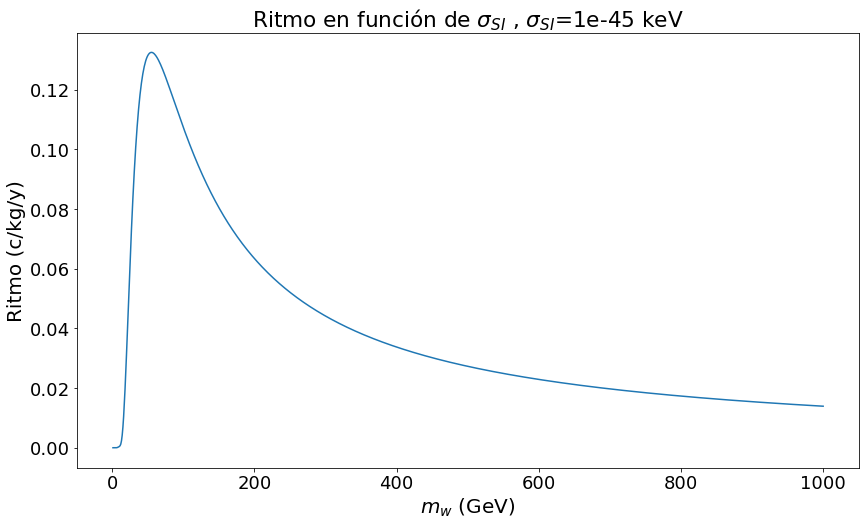

In [21]:
#Calculamos función Ritmo vs Masa Wimp

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

sigma_si=1e-45

mWs= np.linspace(1,1000,1000)

R=np.array([totalRateNaI(10,60,timeAvg,m,sigma_si) for m in mWs])


plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(mWs,R, label = "$R_{num}$")
ax.set_title(r'Ritmo en función de $\sigma_{SI}$ , $\sigma_{SI}$='+str(sigma_si)+' keV')
ax.set_ylabel(r'Ritmo (c/kg/y)',fontsize=20)
ax.set_xlabel('$m_w$ (GeV)',fontsize=20)
#ax.set_yscale("log")
